# Import libraries and dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
customer = pd.read_csv('https://github.com/FourthRevGitHub/CAM_DS_Public-Data-Sets/raw/main/Course%201/Week%206/CUSTOMERS_CLEAN.zip')

# View dataframe
customer.head()

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


The libraries and dataset were imported. An overview of the first 5 rows is shown with the different variables.

# Data exploration and cleaning

In [2]:
# View length of dataframe
print(customer.shape)

(951669, 20)


The dataset has 951669 rows, which are the products ordered by the customers.

In [3]:
# Check for missing values
customer.isnull().sum()

,0
Quantity,0
City,135
Continent,0
Postal_Code,3716
State_Province,117192
Order_Date,0
Delivery_Date,0
Total Revenue,0
Unit Cost,0
Discount,0


In [4]:
# Calculate the missing percentage of each column with missing values
# List of columns to loop
columns_missing_list = ['City', 'Postal_Code', 'State_Province']

# Loop through the columns and calculate the missing percentage
for column in columns_missing_list:
    missing_count = customer[column].isnull().sum()
    total_count = len(customer)
    missing_percentage = (missing_count / total_count) * 100
    print(f"The percentage of missing values for {column} is: {missing_percentage:.2f}%")

The percentage of missing values for City is: 0.01%
The percentage of missing values for Postal_Code is: 0.39%
The percentage of missing values for State_Province is: 12.31%


The missing values are: 135 for 'City', 3716 for 'Postal_Code', and 117192 for 'State_Province'. The other features do not have missing values. None of the features contain more than 50% missing values. Therefore, I will keep the features in the dataset. A domain expert could advise on whether it would be helpful to remove any column that contains missing values or to change the missing values to the median (or in this case the most common city, postal code or state/province in that country). For now, I will leave them as it is and only deal with missing values for the variables needed for analyis.

In [5]:
# Check dataset for duplicate rows
duplicates = customer.duplicated()
print(duplicates.sum())

# Make a list of duplicates indexes
duplicates_index = duplicates[duplicates].index.tolist()
print(duplicates_index)

21
[25809, 59723, 60475, 71116, 85386, 88399, 144437, 245412, 280487, 289173, 303247, 337841, 374959, 474803, 597962, 640384, 660458, 684595, 720820, 745846, 754744]


There are 21 duplicate rows in the dataset.

In [6]:
# Clean the dataset
# Drop duplicate rows
customer_clean = customer.drop_duplicates()

# View output
customer_clean.duplicated().sum()

np.int64(0)

There are no duplicated rows in the new dataset.

In [7]:
# View head
customer_clean.head()

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


In [8]:
# View shape
print(customer_clean.shape)

(951648, 20)


Without the duplicate rows, there are now 951648 rows.

To check for outliers, I will first use descriptive statistics.

In [9]:
# Describe the features of the dataset
customer_clean.describe()

,Quantity,Order ID,Days to Delivery,Loyalty Num,Customer ID
count,951648.000000,9.516480e+05,951648.000000,951648.000000,951648.000000
mean,1.678440,1.236943e+09,1.056116,66.533986,45440.675518
std,0.899921,4.273202e+06,2.065731,46.476828,27214.093293
min,1.000000,1.230000e+09,0.000000,0.000000,1.000000
25%,1.000000,1.233081e+09,0.000000,0.000000,22139.000000
50%,1.000000,1.236755e+09,0.000000,99.000000,44140.000000
75%,2.000000,1.240689e+09,1.000000,99.000000,70411.000000
max,10.000000,1.244338e+09,32.000000,99.000000,94254.000000


We can see that for Quantity and Days to Delivery, there will be many values which are more than 2 standard deviations above the mean.

In [10]:
# Check the data type for each variable
customer_clean.dtypes

,0
Quantity,int64
City,object
Continent,object
Postal_Code,object
State_Province,object
Order_Date,object
Delivery_Date,object
Total Revenue,object
Unit Cost,object
Discount,object


Quantity is an integer, which is correct. I will explore this feature with a histogram and a boxplot.

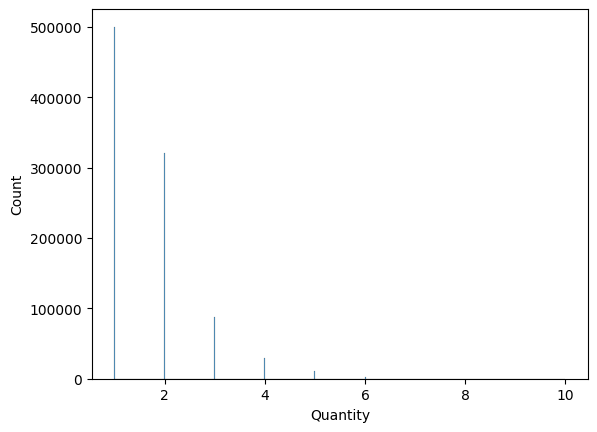

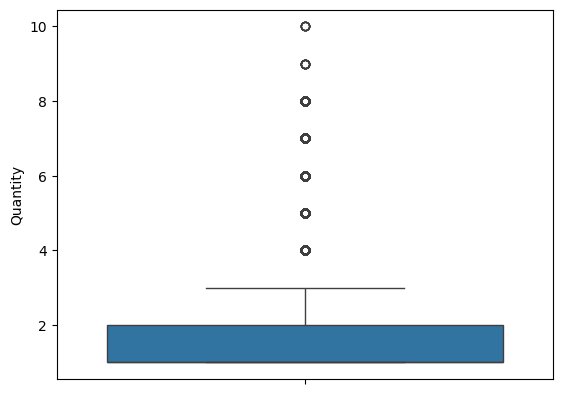

In [11]:
# Generate a histogram and boxplot for 'Quantity'
sns.histplot(customer_clean['Quantity'])
plt.show()
sns.boxplot(customer_clean['Quantity'])
plt.show()

The quantity varies from 1 to 10 products per order. Any oder with more 4 or more products, is shown as an outlier in the boxplot. I will also generate a bar plot for visualisation.

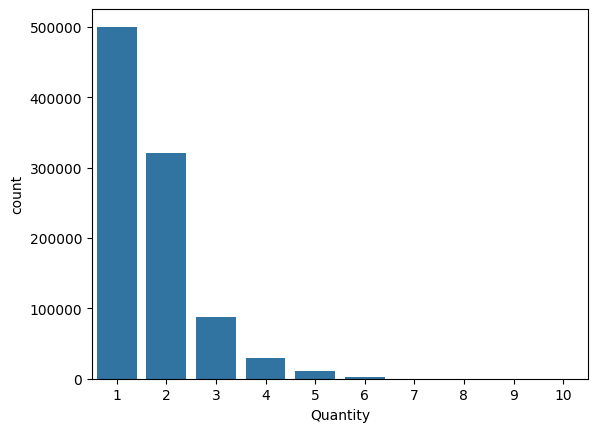

In [12]:
# Generate barplot for 'Quantity'
sns.countplot(x='Quantity', data=customer_clean)
plt.show()

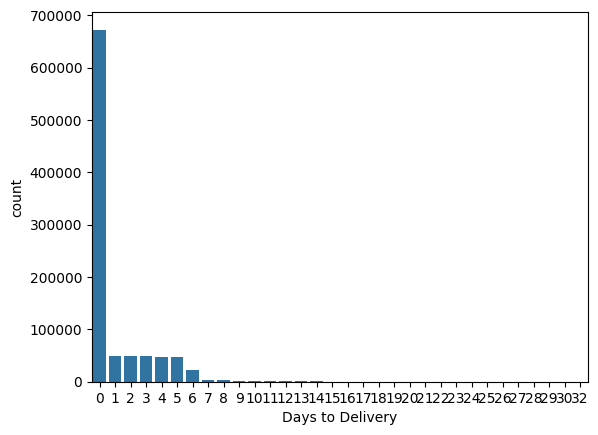

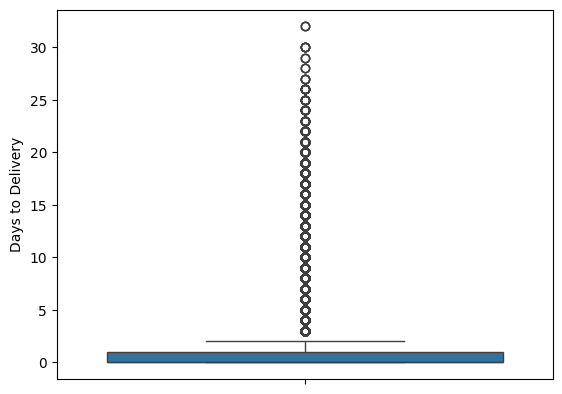

In [13]:
# Create a barchart and boxplot for 'Days to Delivery'
sns.countplot(x='Days to Delivery', data=customer_clean)
plt.show()
sns.boxplot(customer_clean['Days to Delivery'])
plt.show()

Days to delivery varies from 0 to 32 days, with any delivery taking 3 days or longer classified as outliers.

# Feature engineering

In [14]:
# Perform feature engineering
# Creat a new feature called 'Frequency'
customer_clean.loc[:, 'Frequency'] = customer_clean.groupby('Customer ID')['Order ID'].transform('count')

# View output
customer_clean.head()

/tmp/ipython-input-2057593161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'Frequency'] = customer_clean.groupby('Customer ID')['Order ID'].transform('count')


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,...,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818,31
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,...,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793,20
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,...,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793,20
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,...,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727,20
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,...,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503,6


A new variable named 'Frequency' was added to the dataframe.

In [15]:
# Create new variable called 'Recency': the time since last order
customer_clean.loc[:, 'Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_clean['Delivery_Date'], format= '%d%b%Y')).dt.days

# View output
customer_clean.head()

/tmp/ipython-input-4243708419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_clean['Delivery_Date'], format= '%d%b%Y')).dt.days


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency,Recency
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,...,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818,31,5064
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,...,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793,20,5067
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,...,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793,20,5067
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,...,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727,20,5068
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,...,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503,6,5067


A new variable 'Recency' (number of days since the last order), was added to the dataframe.

In [16]:
# Create a new variable named CLV (customer lifetime value) which is the total revenue a customer contributes to the business over time, given the customer remains loyal to the business. This is the same as 'Total Revenue'.
# First, convert the currency to string
customer_clean.loc[:, 'Total Revenue'] = customer_clean.loc[:, 'Total Revenue'].astype(str)

# Replace $ and ,
customer_clean.loc[:, 'Total Revenue'] = customer_clean.loc[:, 'Total Revenue'].str.replace('$', '').str.replace(',', '')

# Convert to float
customer_clean.loc[:, 'Total Revenue'] = customer_clean.loc[:, 'Total Revenue'].astype(float)

# Define new variable CLV
customer_clean.loc[:, 'CLV'] = customer_clean.loc[:, 'Total Revenue']

# View output
customer_clean.head()

/tmp/ipython-input-2893031859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'CLV'] = customer_clean.loc[:, 'Total Revenue']


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency,Recency,CLV
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,28.5,$9.10,.,...,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818,31,5064,28.5
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,113.4,$56.90,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793,20,5067,113.4
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,41.0,$18.50,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793,20,5067,41.0
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,35.2,$29.60,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727,20,5068,35.2
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,24.7,$23.60,.,...,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503,6,5067,24.7


A new variable 'CLV' was added to the dataframe. This is the total revenue in Dollars that a customer is expected to contribute to the business based on loyalty.

In [17]:
# Rename feature 'Unit Cost' to 'Average_Unit_Cost'
customer_clean.loc[:, 'Average_Unit_Cost'] = customer_clean.loc[:, 'Unit Cost']

# Change currancy to string
customer_clean.loc[:, 'Average_Unit_Cost'] = customer_clean.loc[:, 'Average_Unit_Cost'].astype(str)

# Replace $ , ( and )
customer_clean.loc[:, 'Average_Unit_Cost'] = customer_clean.loc[:, 'Average_Unit_Cost'].str.replace('$', '').str.replace(',', '').str.replace('(', '').str.replace(')', '')

# Convert to float
customer_clean.loc[:, 'Average_Unit_Cost'] = customer_clean.loc[:, 'Average_Unit_Cost'].astype(float)

# View output
customer_clean.head()

/tmp/ipython-input-1202851409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'Average_Unit_Cost'] = customer_clean.loc[:, 'Unit Cost']


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,28.5,$9.10,.,...,Internet/Catalog Customers,1230000033,$1.20,6,99,8818,31,5064,28.5,9.1
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,113.4,$56.90,.,...,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793,20,5067,113.4,56.9
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,41.0,$18.50,.,...,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793,20,5067,41.0,18.5
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,35.2,$29.60,.,...,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727,20,5068,35.2,29.6
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,24.7,$23.60,.,...,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503,6,5067,24.7,23.6


A new variable 'Average_Unit_Cost' was added to the dataframe, which is the average amount in Dollars a customer spends on the products purchased.

In [18]:
# Create new variable named 'Customer_Age'
# Make a new variable DOB from Customer_BirthDate
customer_clean.loc[:, 'DOB'] = customer_clean.loc[:, 'Customer_BirthDate']

# Convert DOB to string
customer_clean.loc[:, 'DOB'] = customer_clean.loc[:, 'DOB'].astype(str)

# Remove , / -
customer_clean.loc[:, 'DOB'] = customer_clean.loc[:, 'DOB'].str.replace('-', '').str.replace('/', '').str.replace(',', '')

# Ensure all are uppercase
customer_clean.loc[:, 'DOB'] = customer_clean.loc[:, 'DOB'].str.upper()

# Convert DOB to datetime
customer_clean.loc[:, 'DOB'] = pd.to_datetime(customer_clean.loc[:, 'DOB'], format= '%d%b%Y', errors= 'coerce')

# View output
customer_clean.head()

/tmp/ipython-input-1026101211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'DOB'] = customer_clean.loc[:, 'Customer_BirthDate']


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,DOB
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,28.5,$9.10,.,...,1230000033,$1.20,6,99,8818,31,5064,28.5,9.1,1978-05-08 00:00:00
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,113.4,$56.90,.,...,1230000204,($0.40),3,99,47793,20,5067,113.4,56.9,1978-12-13 00:00:00
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,41.0,$18.50,.,...,1230000204,$4.00,3,99,47793,20,5067,41.0,18.5,1978-12-13 00:00:00
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,35.2,$29.60,.,...,1230000268,$5.60,2,0,71727,20,5068,35.2,29.6,1997-06-22 00:00:00
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,24.7,$23.60,.,...,1230000487,$1.10,3,99,74503,6,5067,24.7,23.6,1978-01-28 00:00:00


A new variable 'DOB' was added to the dataframe. I will check if this is indeed a datetime type now.

In [19]:
# Check data types
customer_clean.dtypes

,0
Quantity,int64
City,object
Continent,object
Postal_Code,object
State_Province,object
Order_Date,object
Delivery_Date,object
Total Revenue,object
Unit Cost,object
Discount,object


The new variable is classified as an object. I will check if there are missing values preventing this from being classified as datetime.

In [20]:
# Check for missing values
customer_clean.isnull().sum()

,0
Quantity,0
City,135
Continent,0
Postal_Code,3716
State_Province,117192
Order_Date,0
Delivery_Date,0
Total Revenue,0
Unit Cost,0
Discount,0


There are no missing values for DOB. I will try again to convert it to datetime. This time I will not use '.loc'.

In [21]:
# Convert DOB to datetime
customer_clean['DOB'] = pd.to_datetime(customer_clean['DOB'], format= '%d%b%Y', errors= 'coerce')

# View output
print(customer_clean['DOB'].dtype)
print(customer_clean['DOB'].head())

datetime64[ns]
0   1978-05-08
1   1978-12-13
2   1978-12-13
3   1997-06-22
4   1978-01-28
Name: DOB, dtype: datetime64[ns]


/tmp/ipython-input-3247368706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean['DOB'] = pd.to_datetime(customer_clean['DOB'], format= '%d%b%Y', errors= 'coerce')


The data type is now 'datetime64'

In [22]:
# Calculate age from DOB
today = pd.Timestamp('now')
customer_clean.loc[:, 'Customer_Age'] = (today - customer_clean.loc[:, 'DOB']).dt.days // 365

# View output
customer_clean.head()

/tmp/ipython-input-375223528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean.loc[:, 'Customer_Age'] = (today - customer_clean.loc[:, 'DOB']).dt.days // 365


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Profit,Days to Delivery,Loyalty Num,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,DOB,Customer_Age
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,28.5,$9.10,.,...,$1.20,6,99,8818,31,5064,28.5,9.1,1978-05-08,47
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,113.4,$56.90,.,...,($0.40),3,99,47793,20,5067,113.4,56.9,1978-12-13,46
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,41.0,$18.50,.,...,$4.00,3,99,47793,20,5067,41.0,18.5,1978-12-13,46
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,35.2,$29.60,.,...,$5.60,2,0,71727,20,5068,35.2,29.6,1997-06-22,28
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,24.7,$23.60,.,...,$1.10,3,99,74503,6,5067,24.7,23.6,1978-01-28,47


A new variable 'Customer_Age' was added to the dataframe. This is the customer's age in years.

In [23]:
# Check data type of Customer_Age
print(customer_clean['Customer_Age'].dtype)

int64


The new variable Customer_Age is an integer.

In [24]:
# Remove all features except for Customer ID, Frequency, Recency, CLV, Average_Unit_Cost, and Customer_Age
customer_small = customer_clean[['Customer ID', 'Frequency', 'Recency', 'CLV', 'Average_Unit_Cost', 'Customer_Age']]

# View output
customer_small.head()

,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
0,8818,31,5064,28.5,9.1,47
1,47793,20,5067,113.4,56.9,46
2,47793,20,5067,41.0,18.5,46
3,71727,20,5068,35.2,29.6,28
4,74503,6,5067,24.7,23.6,47


A small dataframe was created using only the five new variables and Customer ID

In [25]:
# Aggregate the dataframe into one customer per row
customer_aggregated = customer_small.groupby('Customer ID').agg({
    'Frequency': 'mean',
    'Recency': 'min',
    'CLV': 'sum',
    'Average_Unit_Cost': 'mean',
    'Customer_Age': 'mean'
    }).reset_index()

# View output
customer_aggregated.head()

,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
0,1,35.0,3262,4322.7,89.622857,72.0
1,3,20.0,3364,2821.0,90.505,42.0
2,4,9.0,4353,782.67,37.195556,42.0
3,5,19.0,3250,2810.98,107.947368,37.0
4,6,15.0,3435,1604.58,52.526667,66.0


The Customer ID was used to aggregate the data by customer. Frequency indicates how often a customer makes purchases. It was calculated by the sum of purchases. As this number should be the same for each purchase of a given customer, I used the mean value here. Recency is the number of days since the last purchase. I used the minimum value here, as this is the minimum number of days since the purchase (i.e. the most recent one). CLV is the value the customer is expected to contribute to the business. I used the sum of the Total revenue here. I also used the average value for the Average_Unit_Cost. As I expect Customer_Age to be the same for a customer ID, I used the average here.

In [26]:
# Set Customer ID as index
# customer_aggregated.set_index('Customer ID', inplace=True)

# View output
# print(customer_aggregated.shape)
# customer_aggregated.head()

Looking at the shape, we can see that there are now 5 columns (features) left in the dataframe. By aggregating the data by customer ID, there are now 68300 rows left, each representing a unique customer.

In [27]:
# Check for missing values
customer_aggregated.isnull().sum()

,0
Customer ID,0
Frequency,0
Recency,0
CLV,0
Average_Unit_Cost,0
Customer_Age,0


There are no missing values in the new dataframe.

In [28]:
# Check data types
customer_aggregated.dtypes

,0
Customer ID,int64
Frequency,float64
Recency,int64
CLV,object
Average_Unit_Cost,object
Customer_Age,float64


Age, Frequency and Recency should be classified as integers, because these are respectively years, number of purchases and days. CLV and Average_Unit_Cost are classified as objects. However, these should be floats with 2 decimal points.

In [29]:
# Round CLV and Average_Unit_Cost to 2 decimals and convert to float
customer_aggregated['CLV'] = customer_aggregated['CLV'].round(2).astype(float)
customer_aggregated['Average_Unit_Cost'] = customer_aggregated['Average_Unit_Cost'].round(2).astype(float)

# Change Customer_Age and Frequency to integer
customer_aggregated['Customer_Age'] = customer_aggregated['Customer_Age'].astype(int)
customer_aggregated['Frequency'] = customer_aggregated['Frequency'].astype(int)

# View output
print(customer_aggregated.dtypes)
customer_aggregated.head()

Customer ID            int64
Frequency              int64
Recency                int64
CLV                  float64
Average_Unit_Cost    float64
Customer_Age           int64
dtype: object


,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
0,1,35,3262,4322.70,89.622857,72
1,3,20,3364,2821.00,90.505000,42
2,4,9,4353,782.67,37.195556,42
3,5,19,3250,2810.98,107.947368,37
4,6,15,3435,1604.58,52.526667,66


The data types now reflect the features correctly. Encoding is not needed because all variables are numerical.

# Exploratory data analysis (new dataframe)

In [30]:
# Perform EDA on the new dataframe
# Generate descriptive statistics
customer_aggregated.describe()

,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
count,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000
mean,45447.623397,13.933353,3611.399971,1950.148420,78.895675,52.024817
std,27203.855105,11.328807,414.289931,1719.916365,38.005259,17.485625
min,1.000000,1.000000,3225.000000,0.630000,0.500000,27.000000
25%,22160.500000,6.000000,3289.000000,696.000000,57.579792,37.000000
50%,44140.500000,11.000000,3433.000000,1497.400000,73.450000,52.000000
75%,70423.250000,19.000000,3783.000000,2709.845000,92.515260,67.000000
max,94254.000000,121.000000,5069.000000,18860.960000,1463.500000,82.000000


Descriptive statistics show the average, minimum and maximum values for each feature. The customer age, for example, is 51 years on average, ranging from 17 up to 82 years.

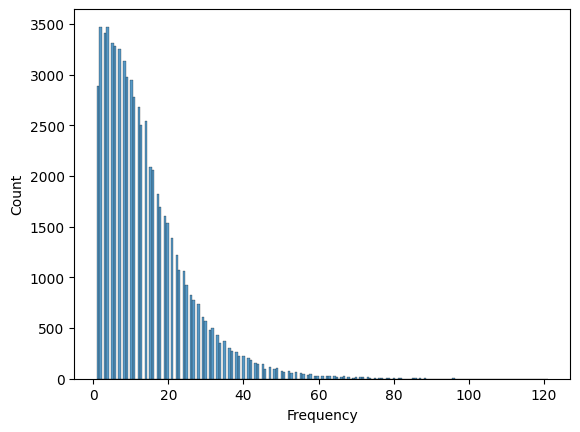

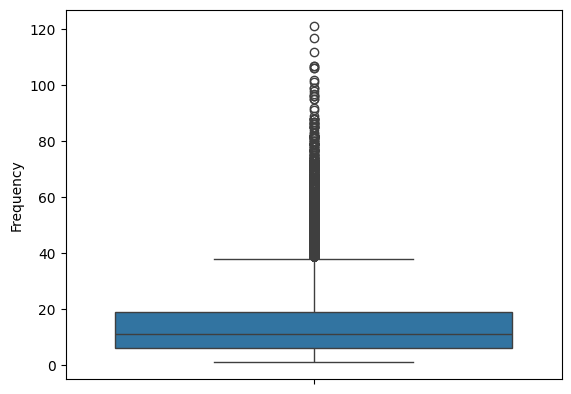

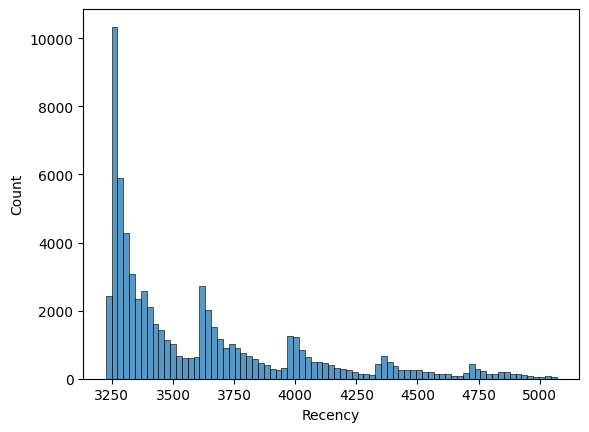

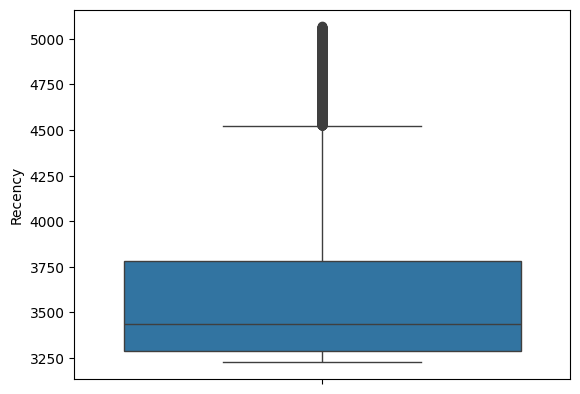

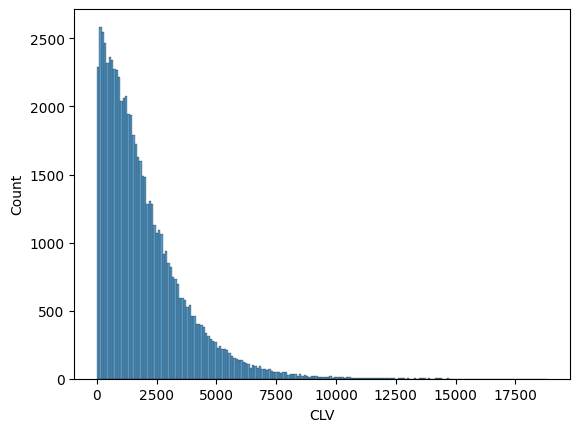

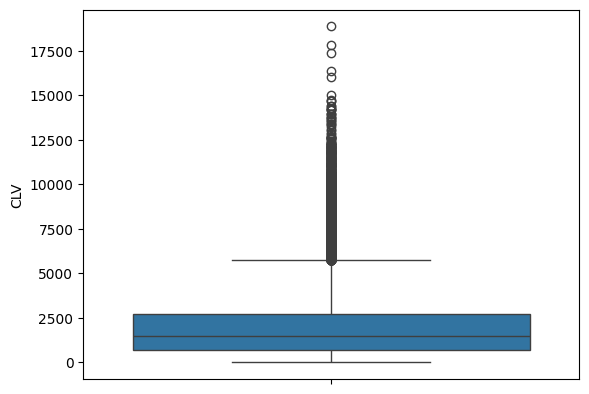

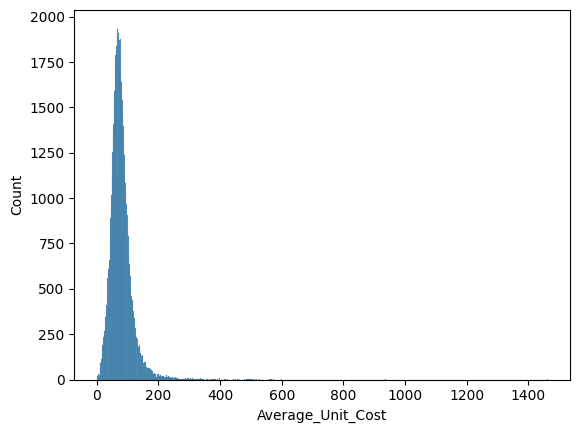

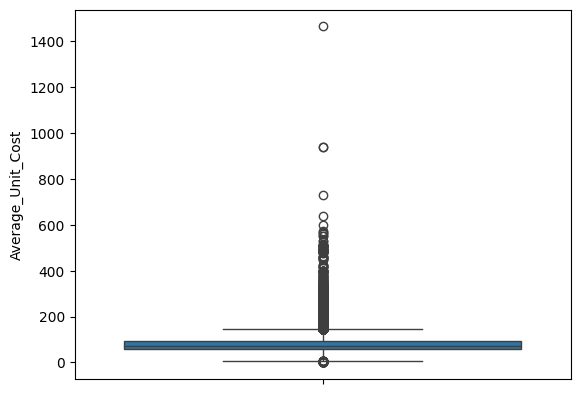

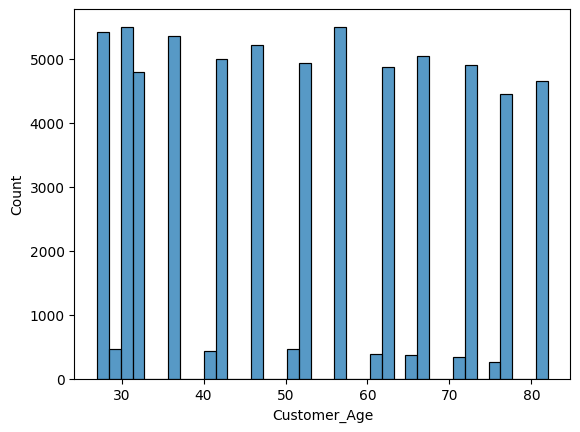

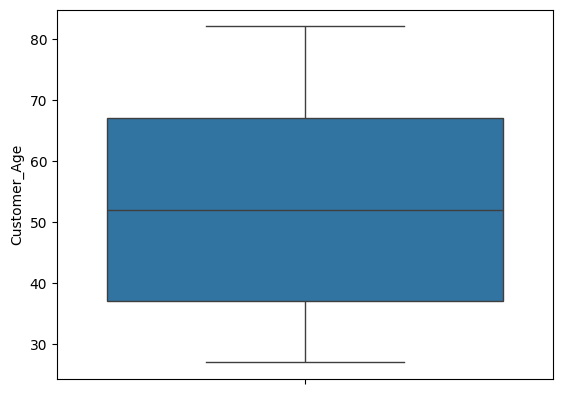

In [31]:
# Create histograms and boxplots for each feature
sns.histplot(customer_aggregated['Frequency'])
plt.show()
sns.boxplot(customer_aggregated['Frequency'])
plt.show()
sns.histplot(customer_aggregated['Recency'])
plt.show()
sns.boxplot(customer_aggregated['Recency'])
plt.show()
sns.histplot(customer_aggregated['CLV'])
plt.show()
sns.boxplot(customer_aggregated['CLV'])
plt.show()
sns.histplot(customer_aggregated['Average_Unit_Cost'])
plt.show()
sns.boxplot(customer_aggregated['Average_Unit_Cost'])
plt.show()
sns.histplot(customer_aggregated['Customer_Age'])
plt.show()
sns.boxplot(customer_aggregated['Customer_Age'])
plt.show()

Frequency and CLV show a distribution which is skewed to the right with many outliers in the higher values. Recency shows an interesting distribution, which is also skewed to the right, but has peaks which seems to repeat every year (365 days) and then gradually decrease until the next peak. The outlier are also in the higher values. Average Unit Cost looks normally distributed in the histogram. However, looking at the boxplot, it seems skewed to the right with many outliers in the higher values (which may not be clearly shown due to the high peak in the histogram). Customer age seems to be quite evenly distributed over all age groups. The boxplot does not have any ouliers.

# Normalisation for scaling

In [32]:
# Use normalisation for scaling
from sklearn.preprocessing import MinMaxScaler

# Make a scaled dataframe using normalisation
scaler = MinMaxScaler()
customer_normalised = pd.DataFrame(scaler.fit_transform(customer_aggregated), columns= customer_aggregated.columns)

# View output
customer_normalised.head()

,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
0,0.000000,0.283333,0.020065,0.229162,0.060918,0.818182
1,0.000021,0.158333,0.075380,0.149540,0.061521,0.272727
2,0.000032,0.066667,0.611714,0.041465,0.025082,0.272727
3,0.000042,0.150000,0.013557,0.149009,0.073443,0.181818
4,0.000053,0.116667,0.113883,0.085044,0.035562,0.709091


Because the data are heavily skewed, with the mean all the way at the lower end of the values for all features except age, I used normalisation for data scaling.

# Generate pipeline for scaling and k-means clustering

In [33]:
# Incorporate column transformer and pipeline for more efficient programming. This will run k-means clustering and scaling together.
# Import relevant classes
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use pipeline for preprocessing
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ['Frequency', 'Recency', 'CLV', 'Average_Unit_Cost', 'Customer_Age'])])

# Fit and transform the data
customer_preprocessed = preprocessor.fit_transform(customer_aggregated)

# Segmentation with K-means
# Prepare the K-means algorithm
kmeans = KMeans(n_clusters=2, random_state=42)

# Create a Pipeline with preprocessing and kmeans clustering
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clustering', kmeans)])

# Fit the pipeline to the data
pipeline.fit(customer_aggregated)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Frequency', 'Recency',
                                                   'CLV', 'Average_Unit_Cost',
                                                   'Customer_Age'])])),
                ('clustering', KMeans(n_clusters=2, random_state=42))])

Column transformer and pipeline were included for more efficient programming. Kmeans was performed with 2 clusters.

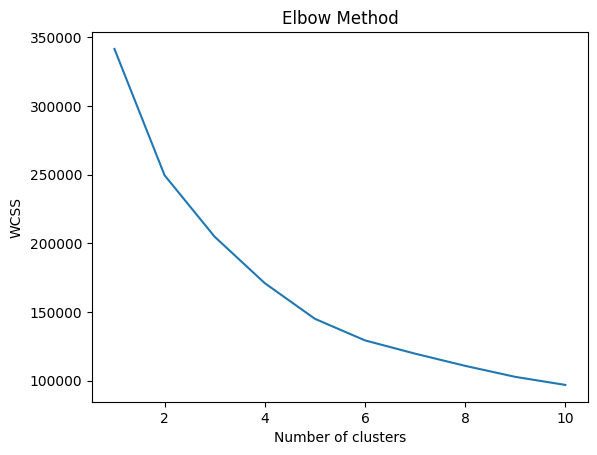

In [34]:
# Perform Kmeans with 1-10 clusters using a loop and use the elbow method
# Define WCSS
wcss = []

# Loop through cluster sizes from 1-10
for n_clusters in range(1, 11):
  # Perform Kmeans
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=10)

  # Create a pipeline with kmeans
  pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clustering', kmeans)])

  # Fit the pipeline to the data
  pipeline.fit(customer_aggregated)

  # Use the elbow method
  wcss.append(kmeans.inertia_)

# Create plot for elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The pipeline was repeated with 1-11 clusters. The elbow method shows that the decline in WCSS stabilises after 6 clusters. I will use the silhouette score to confirm.

In [35]:
# Predict the Silhouette Score
# Import relevant libraries
from sklearn.metrics import silhouette_score

# Perform Silhouette Method in range 2-10 clusters
for n_clusters in range(2, 11):
  kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)

  # Create a pipeline with clusterer
  pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clustering', kmeans)])

  # Fit the pipeline to the data
  pipeline.fit(customer_aggregated)

  # Predict the cluster labels using the fitted pipeline
  cluster_labels = pipeline.predict(customer_aggregated)

  # Calculate silhouette score
  silhouette_avg = silhouette_score(customer_aggregated, cluster_labels)

  # View output
  print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.010135827418725945
For n_clusters = 3, the silhouette score is 0.0002946391358513007
For n_clusters = 4, the silhouette score is -0.003516573487098066
For n_clusters = 5, the silhouette score is -0.011534211473279685
For n_clusters = 6, the silhouette score is -0.010264418095317017
For n_clusters = 7, the silhouette score is -0.01083272003119856
For n_clusters = 8, the silhouette score is -0.013467233044237945
For n_clusters = 9, the silhouette score is -0.0196017886088489
For n_clusters = 10, the silhouette score is -0.02030737501412858


The number of clusters with the highest silhouette score are 2 (0.52) and 3 (0.28). The silhouette score for 6 clusters (0.12) is similar to 4 clusters (0.11).

Now, I will explore the optimal number of clusters using a dendogram. The notebook has crashed at this point and therefore I will first make a smaller dataframe to prevent crashing.

In [36]:
# Make a smaller dataframe
customer_small = customer_normalised.sample(n=20000).reset_index(drop=True)

# View output
print(customer_small.shape)
customer_small.head()

(20000, 6)


,Customer ID,Frequency,Recency,CLV,Average_Unit_Cost,Customer_Age
0,0.246857,0.108333,0.218004,0.072383,0.045201,0.163636
1,0.634547,0.208333,0.032538,0.159105,0.035262,0.181818
2,0.517798,0.108333,0.012473,0.130260,0.055795,0.545455
3,0.593944,0.208333,0.019523,0.212146,0.066231,0.909091
4,0.239218,0.008333,0.251085,0.005385,0.020130,0.909091


# Hierarchical clustering and dendrogram

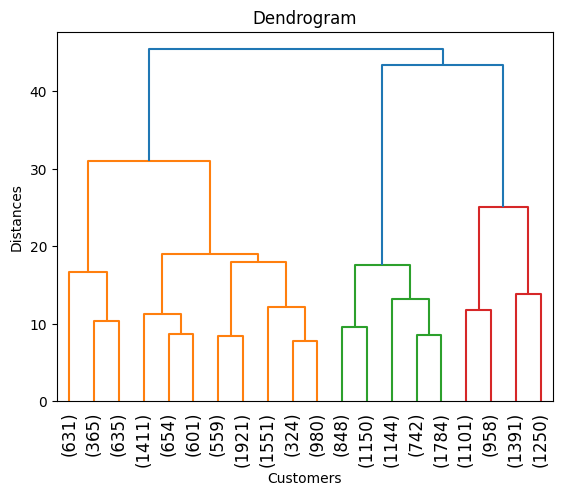

In [37]:
# Perform hierarchical clustering and make a dendrogram
# Import required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(customer_small, 'ward')

# Create a dendogram
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

There is no absolute right or wrong answer in the selection of clusters (University of Cambridge, 2023). The cutoff point for 2, 3 or 4 clusters are at very similar distances: respectively at 28, 25, and 23 distances. However, the cutoff point for 6 clusters is around 15, which makes 6 clusters less preferable based on the hierarchical clustering method.

Based on the combination of the three methods, I will choose 4 clusters. This is in the middle of the Elbow, slightly higher than 6 clusters. The silhouette score is 0.11 which is similar to 6 clusters, and better than 5 clusters (0.09). However, the dendrogram shows that 2, 3, or 4 clusters is prefered over 5 or 6 clusters.

# K-means clustering with 4 clusters

In [38]:
# Perform kmeans clustering using 4 clusters  using pipeline
kmeans = KMeans(n_clusters=4, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clustering', kmeans)])
pipeline.fit(customer_aggregated)

# Make a new dataframe with Customer ID and Cluster number
# Create new feature named 'Cluster'
customer_aggregated['Cluster'] = pipeline.predict(customer_aggregated)

# Create new dataframe using only Customer ID and Cluster number
customer_clusters = customer_aggregated[['Cluster']]

# View output
customer_clusters.head(20)

,Cluster
0,3
1,2
2,2
3,2
4,0
5,3
6,3
7,3
8,2
9,2


Kmeans clustering was performed with 4 clusters. A dataframe was created which assigns a cluster number to each customer ID (the first 20 rows are shown).

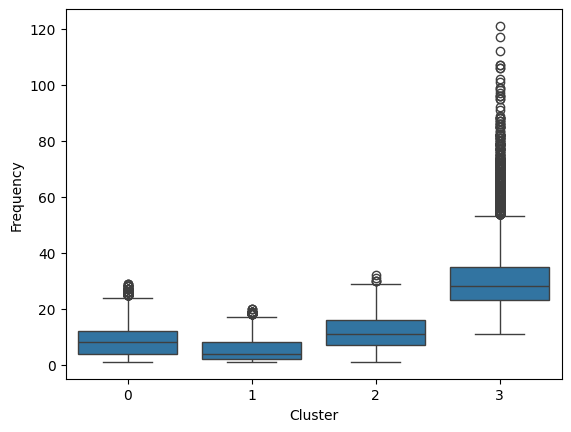

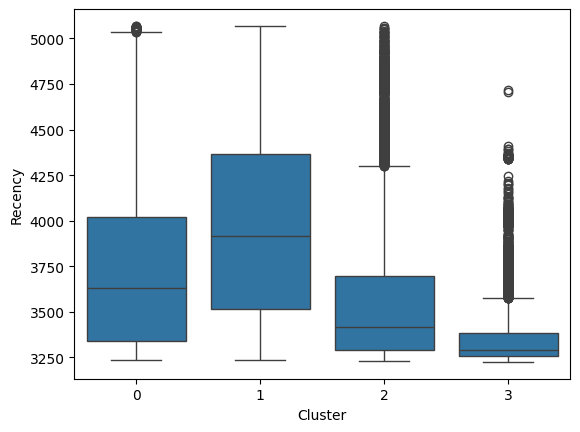

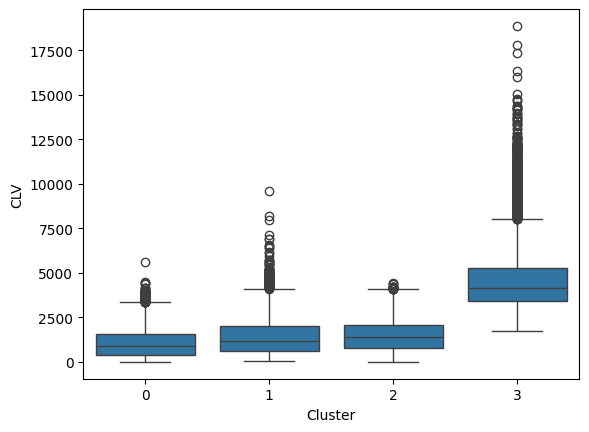

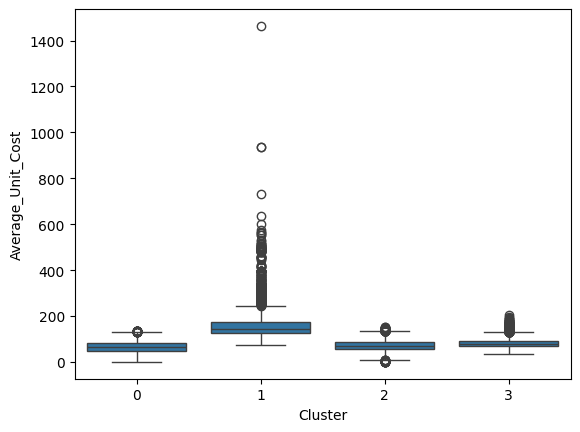

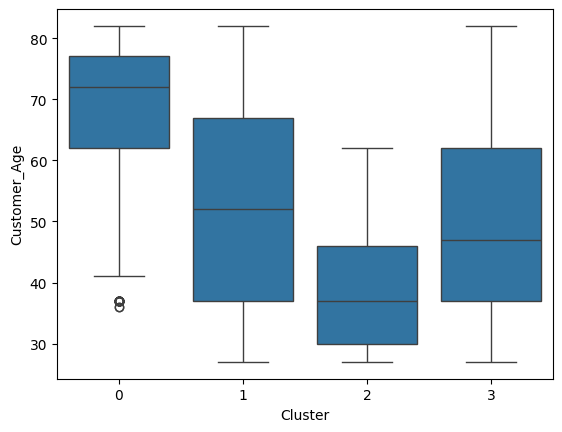

In [39]:
# Create boxplots to display the clusters with regard to frequency, recency, CLV, average unit cost, and customer age.
sns.boxplot(x='Cluster', y='Frequency', data=customer_aggregated)
plt.show()
sns.boxplot(x='Cluster', y='Recency', data=customer_aggregated)
plt.show()
sns.boxplot(x='Cluster', y='CLV', data=customer_aggregated)
plt.show()
sns.boxplot(x='Cluster', y='Average_Unit_Cost', data=customer_aggregated)
plt.show()
sns.boxplot(x='Cluster', y='Customer_Age', data=customer_aggregated)
plt.show()

From the boxplot we can observe the following for each cluster:
Cluster 0 has a higher recency than the other customer clusters, while their CLV seems slightly lower than the other customer clusters. The other features are around the average.
Cluster 1 has a higher frequency and CLV than the other customer clusters.
Cluster 2 has average scores for all feature except for age: this group is younger than the other clusters.
Cluster 3 also has average scores for all features except for age: this group is older than the other customer clusters.

# Dimensionality reduction with PCA

In [40]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
customer_pca = pca.fit_transform(customer_normalised)

# Convert back to a Pandas DataFrame
customer_pca = pd.DataFrame(customer_pca, columns=['PC1', 'PC2'])

# View output
print(customer_pca.shape)
customer_pca.head()

(68300, 2)


,PC1,PC2
0,0.289881,-0.484459
1,-0.223737,-0.471026
2,-0.126411,-0.490567
3,-0.322168,-0.466189
4,0.218049,-0.485907


PCA was performed and the dataframe now has 2 columns: PC1 and PC2.

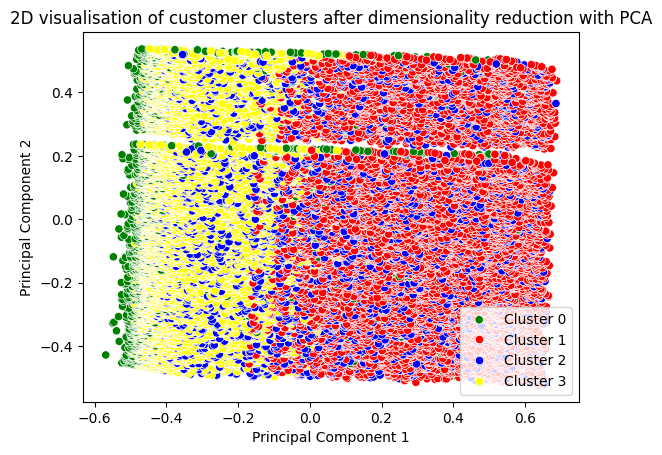

In [41]:
# Create 2D visualisation with the two principal components and the clusters in different colours
# Add 'Cluster' feature to the dataframe for PCA
customer_pca['Cluster'] = customer_clusters

# Create visualisation
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=customer_pca, palette= ["Red", "Blue", "Yellow", "Green"])
plt.title('2D visualisation of customer clusters after dimensionality reduction with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

PCA has not successfully helped with visualisation of the customer clusters.

# Dimensionality reduction with t-SNE

In [ ]:
# Perform dimensionality reduction with t-SNE
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30.0)

# Fit the t-SNE model to the data
customer_tsne = tsne.fit_transform(customer_normalised)

# Transform back to Pandas DataFrame
customer_tsne = pd.DataFrame(customer_tsne, columns=['TSNE1', 'TSNE2'])

# View output
print(customer_tsne.shape)
customer_tsne.head()

In [ ]:
# Create 2D visualisation of customer clusters using t-SNE dimensions
customer_tsne['Cluster'] = customer_clusters

# Create visualisation
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=customer_tsne, palette=["Red", "Blue", "Yellow", "Green"])
plt.title('2D visualisation of customer clusters after dimensionality reduction with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

t-SNE was used for visualisation of the complete dataset with 4 customer clusters.

In [ ]:
# Perform dimensionality reduction with t-SNE on a smaller dataframe
# Perform t-SNE
tsne2 = TSNE(n_components=2, perplexity=30.0)
customer_tsne2 = tsne2.fit_transform(customer_small)

# View the output
customer_tsne2 = pd.DataFrame(customer_tsne2, columns=['TSNE1', 'TSNE2'])

# Create 2D visualisation of customer clusters using t-SNE dimensions
customer_tsne2['Cluster'] = customer_clusters

# Create visualisation
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=customer_tsne2, palette=["Red", "Blue", "Yellow", "Green"])
plt.title('2D visualisation of customer clusters after dimensionality reduction with t-SNE (perplexity=30)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

t-SNE was used for 2D visualisation of a sample of the dataset with perplexity of 30.

In [ ]:
# Perform t-SNE on smaller dataframe with perplexity of 10
tsne3 = TSNE(n_components=2, perplexity=10.0)
customer_tsne3 = tsne3.fit_transform(customer_small)

# View the output
customer_tsne3 = pd.DataFrame(customer_tsne3, columns=['TSNE1', 'TSNE2'])

# Create 2D visualisation of customer clusters using t-SNE dimensions
customer_tsne3['Cluster'] = customer_clusters

# Create visualisation
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=customer_tsne3, palette=["Red", "Blue", "Yellow", "Green"])
plt.title('2D visualisation of customer clusters after dimensionality reduction with t-SNE (perplexity=10)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

t-SNE was used for 2D visualisation of a sample of the dataset with perplexity of 10.

In [ ]:
# Perform t-SNE on smaller dataframe with perplexity of 50
tsne4 = TSNE(n_components=2, perplexity=50.0)
customer_tsne4 = tsne4.fit_transform(customer_small)

# View the output
customer_tsne4 = pd.DataFrame(customer_tsne4, columns=['TSNE1', 'TSNE2'])

# Create 2D visualisation of customer clusters using t-SNE dimensions
customer_tsne4['Cluster'] = customer_clusters

# Create visualisation
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=customer_tsne4, palette=["Red", "Blue", "Yellow", "Green"])
plt.title('2D visualisation of customer clusters after dimensionality reduction with t-SNE (perplexity=50)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

t-SNE was used for 2D visualisation of a sample of the dataset with perplexity of 50.

# References

Cardona, A., 2023. Mini-Project 6.3. Presentation at University of Cambridge, Institute of Continuing Education, Monday 24 March. Available at: https://studentcommunity.fourthrev.com/c/content-discussions-176e5b/ [Accessed 5 April 2025]. Password protected.

Gupta, R., 2023. Mastering GroupBy Aggregation in Pandas: Using Different Aggregated Functions on Different Columns and Renaming Them. Geek Culture. Available at: https://medium.com/geekculture/mastering-groupby-aggregation-in-pandas-using-different-aggregated-functions-on-different-columns-9dca54b75961 [Accessed 5 April 2025].

SAS, 2024. CUSTOMERS_CLEAN [Data set]. SAS. Last revised on 15 December 2021. [Accessed 20 February 2024].

Scikit-learn, 2023. Column Transformer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html [Accessed 5 April 2025].

Scikit-learn, 2023. 6.1. Pipelines and composite estimators. Available at: https://scikit-learn.org/stable/modules/compose.html [Accessed 5 April 2025].

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_101 Applying statistics and core data science techniques in business: 6.1.4 Choosing the appropriate number of clusters. Available at: https://fourthrev.instructure.com/courses/840/modules [Accessed 5 April 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_101 Applying statistics and core data science techniques in business: 6.2.2 Similarity measures Available at: https://fourthrev.instructure.com/courses/840/modules [Accessed 5 April 2025]. Password protected.